In [2]:
import numpy as np
import kwant
import PauliMatrices as PM
from math import pi
from cmath import sqrt

In [34]:
a=1;
t=25/a/a;
alpha=5/(2*a);
Delta_0=.2;
mu=0.2;
wireLength=100;
Vz=0;
Gamma=1e-5;Nbarrier=2;Ebarrier=10;mumax=1;

In [7]:
np.warnings.filterwarnings('ignore');
junction=kwant.Builder();
lat=kwant.lattice.chain(a);    

In [12]:
for x in range(wireLength):
            junction[lat(x)]=(-mu+2*t)*PM.tzs0+Delta_0*PM.txs0+Vz*PM.t0sx-1j*Gamma*PM.t0s0;

In [21]:
junction[lat(0)]

array([[ 49.8-1.e-05j,   0. +0.e+00j,   0.2+0.e+00j,   0. +0.e+00j],
       [  0. +0.e+00j,  49.8-1.e-05j,   0. +0.e+00j,   0.2+0.e+00j],
       [  0.2+0.e+00j,   0. +0.e+00j, -49.8-1.e-05j,   0. +0.e+00j],
       [  0. +0.e+00j,   0.2+0.e+00j,   0. +0.e+00j, -49.8-1.e-05j]])

In [25]:
for x in range(1,wireLength):
            junction[lat(x-1),lat(x)]=-t*PM.tzs0-1j*alpha*PM.tzsy;

In [33]:
junction[lat(0)]

array([[ 59.8,   0. ,   0. ,   0. ],
       [  0. ,  59.8,   0. ,   0. ],
       [  0. ,   0. , -59.8,   0. ],
       [  0. ,   0. ,   0. , -59.8]])

In [26]:
junction[lat(0),lat(1)]

array([[-25. +0.j,  -2.5+0.j,  -0. +0.j,  -0. +0.j],
       [  2.5+0.j, -25. +0.j,  -0. +0.j,  -0. +0.j],
       [ -0. +0.j,  -0. +0.j,  25. +0.j,   2.5+0.j],
       [ -0. +0.j,  -0. +0.j,  -2.5+0.j,  25. +0.j]])

In [31]:
for x in range(Nbarrier):
            junction[ lat(x) ] = (2*t - mu + Ebarrier)*PM.tzs0 + Vz*PM.t0sx;

In [65]:
muset=np.cos(np.arange(wireLength)*pi/wireLength)*mumax+mumax

In [40]:
np.arange(wireLength)*mumax

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [51]:
smoothpot='sin'

In [52]:
if smoothpot==0:
    print(0);
else:
    if smoothpot=='sin':
        print('sin');
    else:
        print('cos');
        

sin


In [57]:
import matplotlib.pyplot as plt

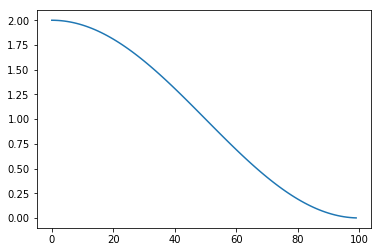

In [66]:
plt.plot(np.arange(wireLength),muset)

In [67]:
muset[1]

1.9995065603657316

In [74]:
'123'*(smoothpot!=0)

''

In [80]:
str(smoothpot)*(smoothpot!=0)

'1'

In [79]:
smoothpot='1'

In [81]:
str(smoothpot)

'1'

In [83]:
symLeft=kwant.TranslationalSymmetry([-a]);
symRight=kwant.TranslationalSymmetry([a]);

In [88]:
leadl=kwant.Builder(symLeft)

In [91]:
leadr=kwant.Builder(symRight)

In [98]:
leadl[ lat(0) ] = (2*t - 2)*PM.tzs0 + Vz*PM.t0sx;leadl[ lat(0), lat(1) ] = -t*PM.tzs0 - 1j*alpha*PM.tzsy;

In [101]:
leadr[ lat(0) ] = (2*t - 2)*PM.tzs0 + Vz*PM.t0sx;leadr[ lat(0), lat(1) ] = -t*PM.tzs0 - 1j*alpha*PM.tzsy;

In [100]:
junction.attach_lead(leadl);

In [109]:
junction.attach_lead(leadr);

In [107]:
sym

NameError: name 'sym' is not defined

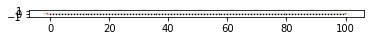

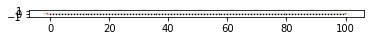

In [110]:
kwant.plot(junction)

In [113]:
junction[lat(2)]

array([[ 49.8-1.e-05j,   0. +0.e+00j,   0.2+0.e+00j,   0. +0.e+00j],
       [  0. +0.e+00j,  49.8-1.e-05j,   0. +0.e+00j,   0.2+0.e+00j],
       [  0.2+0.e+00j,   0. +0.e+00j, -49.8-1.e-05j,   0. +0.e+00j],
       [  0. +0.e+00j,   0.2+0.e+00j,   0. +0.e+00j, -49.8-1.e-05j]])

In [133]:
for x in range(2):
    print(int(-0.5+((leadpos==0)-(leadpos==1))*(x+1))%wireLength)

99
98


15%2

In [132]:
leadpos=1

In [121]:
int(-1.2)

-1

In [134]:
np.ones(10)*Delta_0*PM.txs0

ValueError: operands could not be broadcast together with shapes (10,) (4,4) 

In [139]:
N=2.;

In [140]:
x.reshape((N, N))

AttributeError: 'int' object has no attribute 'reshape'

In [190]:
x=np.linspace(0,10,10)

In [145]:
x = np.random.normal(size=500)
y = x * 3 + np.random.normal(size=500)


In [229]:
nbins=300
xi, yi = np.mgrid[x.min():x.max():nbins*1j, x.min():x.max():2*nbins*1j]


In [230]:
z=xi+yi

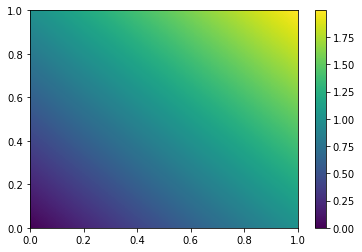

In [231]:
plt.pcolormesh(xi,yi,z);plt.colorbar()

In [205]:
yi.shape

(300, 300)

In [198]:
np.mgrid[x[0]:x[-1],x[0]:x[-1]]

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
        [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
        [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
        [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
        [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]],

       [[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]

In [197]:
x

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

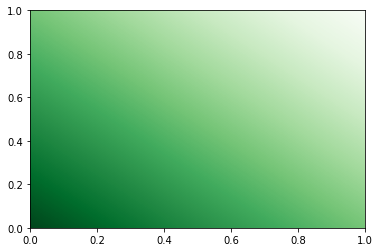

In [234]:
fig=plt.pcolormesh(xi, yi, z.reshape(xi.shape), cmap=plt.cm.Greens_r)


In [220]:
z.shape

(300, 600)

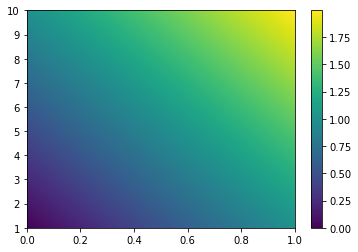

In [235]:
plt.pcolormesh(x,x2,np.transpose(z));plt.colorbar();plt.savefig('t.png')

In [211]:
x=np.linspace(0,1,300)

In [212]:
x.shape

(300,)

In [221]:
x2=np.linspace(1,10,600)

In [ ]:
plt.savefig('')

In [239]:
result = {
  'a': lambda x: x * 5,
  'b': lambda x: x + 7,
  'c': lambda x: x - 2
}['a'](2)